In [174]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\chinm\Downloads\Traffic.csv')

In [175]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [176]:
df['date_time']=pd.to_datetime(df['date_time'])
df['dayofweek']=df['date_time'].dt.dayofweek
df['holiday_X']=df.holiday.map({'None':0,'Christmas Day':1,'Columbus Day':1,'Independence Day':1,'Labor Day':1,'Martin Luther King Jr Day':1,'Memorial Day':1,'New Years Day':1,'State Fair':1,'Thanksgiving Day':1,'Veterans Day':1,'Washingtons Birthday':1})
df['weekend_X']=df.dayofweek.map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})
df_sub1=df[(df['holiday_X']==1)]
df_sub1['date_time']=df_sub1['date_time'].dt.hour
df=df.drop(['dayofweek'],axis=1)
df['date_time']=df['date_time'].dt.hour

c:\users\chinm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [177]:
df
#df_sub1
#df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday_X,weekend_X
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,9,5545,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10,4516,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,11,4767,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,12,5026,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,13,4918,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40649,None,283.45,0.0,0.0,75,Clouds,broken clouds,19,3543,0,1
40650,None,282.76,0.0,0.0,90,Clouds,overcast clouds,20,2781,0,1
40651,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,21,2159,0,1
40652,None,282.09,0.0,0.0,90,Clouds,overcast clouds,22,1450,0,1


In [178]:
indexNames = df[df['date_time']!=8].index
df.drop(indexNames , inplace=True)

In [91]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday_X,weekend_X
22,None,278.12,0.00,0.0,1,Clear,sky is clear,8,6511,0,0
43,None,281.86,0.00,0.0,1,Clear,sky is clear,8,5985,0,0
65,None,280.57,0.00,0.0,90,Clouds,overcast clouds,8,5534,0,0
88,None,274.99,0.00,0.0,1,Clear,sky is clear,8,3342,0,1
110,None,274.77,0.00,0.0,75,Clouds,broken clouds,8,2232,0,1
...,...,...,...,...,...,...,...,...,...,...,...
40542,None,279.43,0.25,0.0,75,Rain,light rain,8,6032,0,0
40566,None,285.05,0.00,0.0,1,Clear,sky is clear,8,5946,0,0
40590,None,278.83,0.00,0.0,1,Clear,sky is clear,8,5798,0,0
40614,None,275.43,0.00,0.0,75,Clouds,broken clouds,8,3073,0,1


In [179]:
df_sub1['weekend_X']=df_sub1['weekend_X'].replace(0,1)
df_final=pd.concat([df,df_sub1], ignore_index=True, axis=0)

c:\users\chinm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [180]:

df_final=df_final.drop(['holiday_X'],axis=1)


In [159]:
#now to have all the holiday(including weekends) variables in a single column; we map the holiday_X column against the weekend column




In [94]:
df_final

,clouds_all,date_time,dayofweek,holiday,rain_1h,snow_1h,temp,traffic_volume,weather_description,weather_main,weekend_X
0,1,8,NaN,None,0.00,0.0,278.120,6511,sky is clear,Clear,0
1,1,8,NaN,None,0.00,0.0,281.860,5985,sky is clear,Clear,0
2,90,8,NaN,None,0.00,0.0,280.570,5534,overcast clouds,Clouds,0
3,1,8,NaN,None,0.00,0.0,274.990,3342,sky is clear,Clear,1
4,75,8,NaN,None,0.00,0.0,274.770,2232,broken clouds,Clouds,1
...,...,...,...,...,...,...,...,...,...,...,...
1738,20,0,0.0,Washingtons Birthday,0.00,0.0,270.730,623,few clouds,Clouds,1
1739,24,0,0.0,Memorial Day,0.00,0.0,299.487,1088,few clouds,Clouds,1
1740,1,0,2.0,Independence Day,0.00,0.0,297.550,1021,mist,Mist,1
1741,1,0,3.0,State Fair,0.00,0.0,289.020,596,sky is clear,Clear,1


In [257]:
df_final.head()

,clouds_all,date_time,holiday,holiday_X,rain_1h,snow_1h,temp,traffic_volume,weather_description,weather_main,weekend_X
0,1,8,None,0,0.0,0.0,278.12,6511,sky is clear,Clear,0
1,1,8,None,0,0.0,0.0,281.86,5985,sky is clear,Clear,0
2,90,8,None,0,0.0,0.0,280.57,5534,overcast clouds,Clouds,0
3,1,8,None,0,0.0,0.0,274.99,3342,sky is clear,Clear,1
4,75,8,None,0,0.0,0.0,274.77,2232,broken clouds,Clouds,1


In [181]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn . model_selection import train_test_split
X=df_final[['weekend_X','clouds_all','rain_1h','snow_1h']]
y=df_final['traffic_volume']
#X=preprocessing.scale(X)
#y=preprocessing.scale(y)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)
lm1=LinearRegression().fit(X_train , y_train)
y_pred=lm1.predict(X_test)



In [182]:
lm1.intercept_

5559.848474832155

In [183]:
lm1.coef_
lm1.score(X,y)

0.7517527487994862

In [185]:
X1=df_final[['weekend_X','clouds_all','snow_1h']]
y1=df_final['traffic_volume']
#X1=preprocessing.scale(X1)
#y1=preprocessing.scale(y1)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1, y1, test_size = 0.2, random_state = 0)
lm2=LinearRegression().fit(X_train1 , y_train1)
y_pred1=lm2.predict(X_test1)

In [186]:
lm2.intercept_

5559.957224042368

In [187]:
lm2.coef_
lm2.score(X1,y1)

0.7517514034330991

In [103]:
import statsmodels . formula . api as smf
from statsmodels.api import add_constant


In [104]:
X = add_constant(X)


c:\users\chinm\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
result=smf.ols(formula='traffic_volume ~ weekend_X+clouds_all+rain_1h+snow_1h',data=df_final).fit()

In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:45:58   Log-Likelihood:                -14289.
No. Observations:                1743   AIC:                         2.859e+04
Df Residuals:                    1738   BIC:                         2.862e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5565.3923     36.884    150.888      0.000    5493.050    5637.735
weekend_X  -3305.8356     45.650    -72.418      0.000   -3395.369   -3216.302
clouds_all    -1.1434      0.551     -2.075      0.038      -2.224      -0.063
rain_1h        2.8906     30.257      0.096      0.924     -56.453      62.234
snow_1h    -2.274e+04   7881.643     -2.886      0.004   -3.82e+04   -7285.168
==============================================================================
Omnibus:                      915.155   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6701.674
Skew:                          -2.386   Prob(JB):                         0.00
Kurtosis:                      11.337   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
result1=smf.ols(formula='traffic_volume ~ weekend_X+clouds_all+snow_1h',data=df_final).fit()

In [110]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1756.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:46:15   Log-Likelihood:                -14289.
No. Observations:                1743   AIC:                         2.859e+04
Df Residuals:                    1739   BIC:                         2.861e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5565.5133     36.852    151.023      0.000    5493.234    5637.792
weekend_X  -3305.9344     45.625    -72.459      0.000   -3395.420   -3216.449
clouds_all    -1.1405      0.550     -2.074      0.038      -2.219      -0.062
snow_1h    -2.275e+04   7879.296     -2.887      0.004   -3.82e+04   -7293.606
==============================================================================
Omnibus:                      915.295   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6704.893
Skew:                          -2.386   Prob(JB):                         0.00
Kurtosis:                      11.339   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
import numpy as np
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))
#metrics.mean_absolute_error (y_test, y_pred )

949.1664413077239

# np.sqrt(metrics.mean_squared_error(y_test1,y_pred1))
metrics.mean_absolute_error (y_test1,y_pred1)

In [113]:
#np.sqrt(metrics.mean_squared_error(y_test1,y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))

949.1664413077239 949.1714287956107


In [188]:
X_new1=pd.DataFrame({'weekend_X':[1],'clouds_all':[75],'rain_1h':[0],'snow_1h':[0]})
#lm1.predict(X_new1)

In [189]:
lm1.predict(X_new1)

array([2180.30526281])

In [169]:
X_new2=pd.DataFrame({'weekend_X':[0],'clouds_all':[0],'snow_1h':[0]})


In [170]:
lm2.predict(X_new2)

array([3405.93640517])

In [16]:
y_pred

array([2167.1268103 , 5559.84847483, 5480.77775976, 2167.1268103 ,
       2245.31896187, 5542.27720482, 5558.96991133, 5493.95621227,
       2180.30526281, 2180.30526281, 2246.19752537, 2167.1268103 ,
       2246.19752537, 2228.62625535, 5559.84847483, 5517.67742679,
       5559.51956449, 2204.02647733, 5558.96991133, 5480.77775976,
       2246.19752537, 2246.19752537, 5480.77775976, 2211.05498534,
       5480.77775976, 2245.31896187, 2211.05498534, 2245.31896187,
       5480.77775976, 5480.77775976, 5480.77775976, 5480.77775976,
       5558.96991133, 5558.96991133, 5480.77775976, 5558.96991133,
       5480.77775976, 2167.1268103 , 5542.27720482, 5480.77775976,
       5558.96991133, 2189.96946132, 2189.96946132, 2167.1268103 ,
       5555.45565733, 2189.96946132, 5558.96991133, 5542.27720482,
       2245.31896187, 5480.77775976, 5503.62041078, 5493.95621227,
       2228.62625535, 2167.1268103 , 5558.96991133, 5480.77775976,
       5480.77775976, 2180.30526281, 5559.84847483, 5493.95621

In [18]:
from scipy import stats
stats.pearsonr(y_test,y_pred)

(0.8480957594077554, 9.585308726708916e-98)

In [24]:
import numpy as np
metrics . mean_absolute_error ( y_test , y_pred)

600.0832057757794

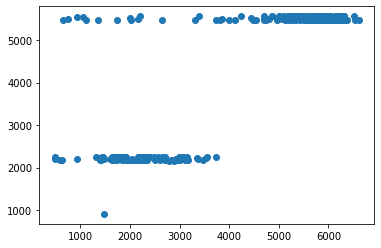

In [27]:
plt.scatter(y_test,y_pred1)

In [44]:
stats.pearsonr(df_final['rain_1h'],df_final['traffic_volume'])

(0.022761441740117037, 0.3422573551077751)

In [45]:
stats.pearsonr(df_final['snow_1h'],df_final['traffic_volume'])

(-0.03650620740438209, 0.1276283420487802)

In [46]:
stats.pearsonr(df_final['temp'],df_final['traffic_volume'])

(0.08275600658812887, 0.0005432804838528075)

In [49]:
stats.pearsonr(df_final['clouds_all'],df_final['traffic_volume'])

(0.03278302035205609, 0.17129567609025836)

In [50]:
stats.pearsonr(df_final['weekend_X'],df_final['traffic_volume'])

(-0.8659997470843454, 0.0)